In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-top-100-movies/movies.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS

In [3]:
df=pd.read_csv('/kaggle/input/imdb-top-100-movies/movies.csv')

In [4]:
df

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,1.0,The Godfather,(1972),R,175 min,"Crime, Drama",9.2,"1,860,471",$134.97M
1,2.0,The Silence of the Lambs,(1991),R,118 min,"Crime, Drama, Thriller",8.6,"1,435,344",$130.74M
2,3.0,Star Wars: Episode V - The Empire Strikes Back,(1980),PG,124 min,"Action, Adventure, Fantasy",8.7,"1,294,805",$290.48M
3,4.0,The Shawshank Redemption,(1994),R,142 min,Drama,9.3,"2,683,302",$28.34M
4,5.0,The Shining,(1980),R,146 min,"Drama, Horror",8.4,"1,025,560",$44.02M
...,...,...,...,...,...,...,...,...,...
94,95.0,The Usual Suspects,(1995),R,106 min,"Crime, Drama, Mystery",8.5,"1,087,832",$23.34M
95,96.0,Cool Hand Luke,(1967),GP,127 min,"Crime, Drama",8.1,"178,888",$16.22M
96,97.0,Eternal Sunshine of the Spotless Mind,(2004),R,108 min,"Drama, Romance, Sci-Fi",8.3,"1,011,004",$34.40M
97,98.0,City Lights,(1931),G,87 min,"Comedy, Drama, Romance",8.5,"186,059",$0.02M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            99 non-null     float64
 1   movie_name       99 non-null     object 
 2   year_of_release  99 non-null     object 
 3   category         99 non-null     object 
 4   run_time         99 non-null     object 
 5   genre            99 non-null     object 
 6   imdb_rating      99 non-null     float64
 7   votes            99 non-null     object 
 8   gross_total      98 non-null     object 
dtypes: float64(2), object(7)
memory usage: 7.1+ KB


In [6]:
df.describe()

,index,imdb_rating
count,99.000000,99.000000
mean,50.000000,8.348485
std,28.722813,0.368772
min,1.000000,7.200000
25%,25.500000,8.100000
50%,50.000000,8.300000
75%,74.500000,8.600000
max,99.000000,9.300000


In [7]:
df.isna().sum()

index              0
movie_name         0
year_of_release    0
category           0
run_time           0
genre              0
imdb_rating        0
votes              0
gross_total        1
dtype: int64

# 📊EDA analysis📊

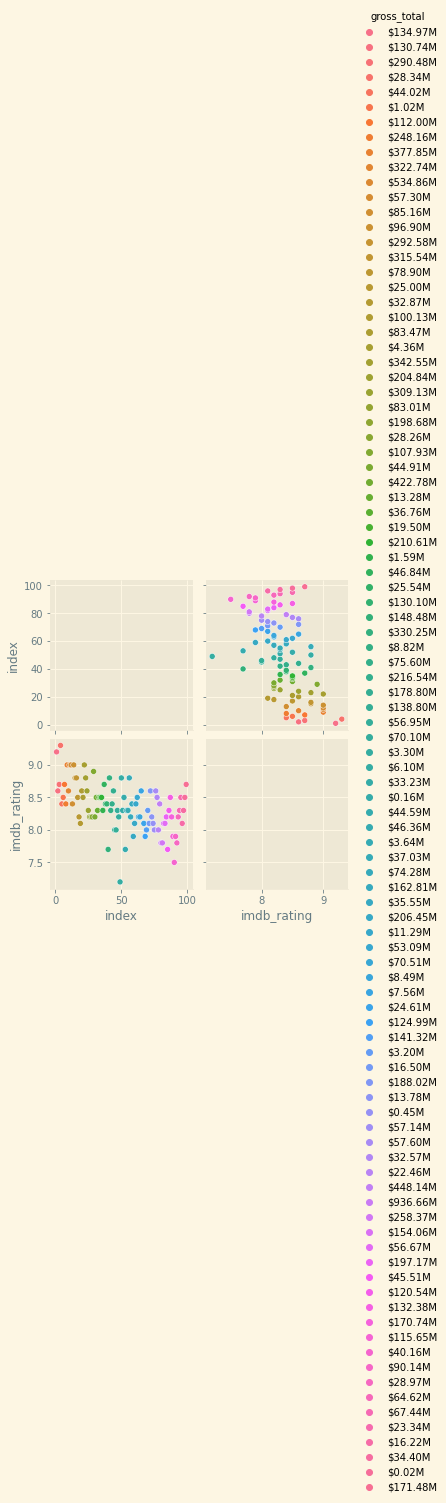

In [8]:
sns.pairplot(df, hue='gross_total')

# 🎥The most common categories🎥

array([<AxesSubplot:ylabel='category'>], dtype=object)

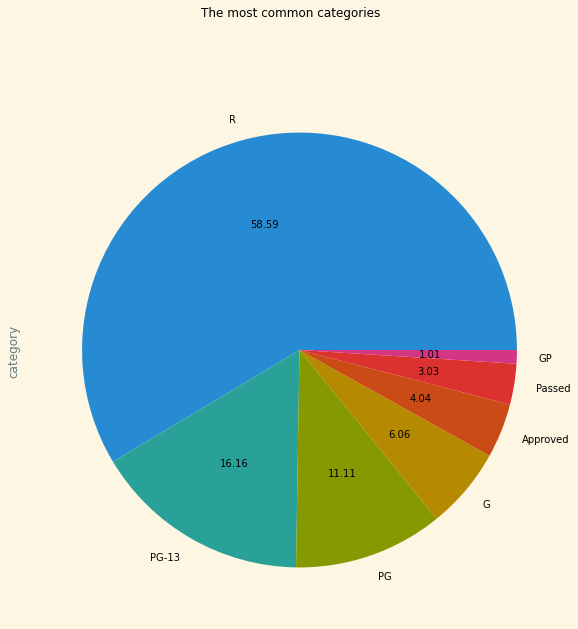

In [9]:
df['category'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(10,10), title='The most common categories')

In [10]:
df['gross_total'] = df['gross_total'].astype(str).str.lstrip('$').str.rstrip('M')

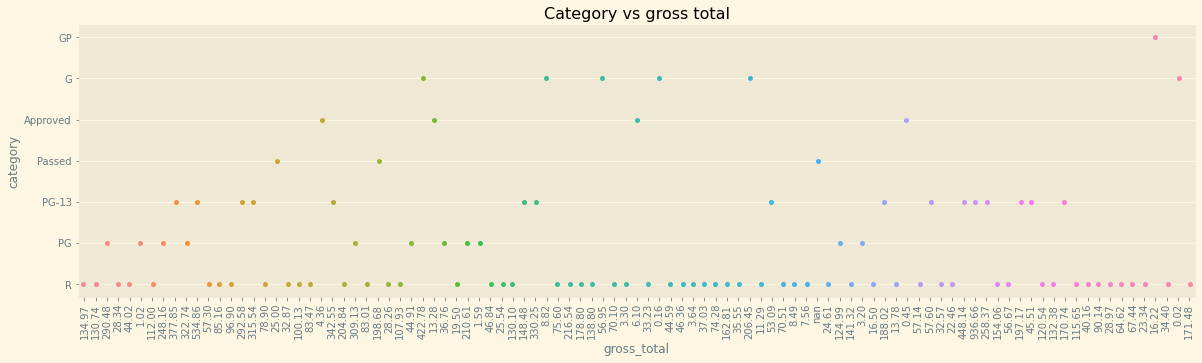

In [11]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation=90)
ax = sns.stripplot(y="category", x="gross_total", data=df).set(title='Сategory vs gross total')

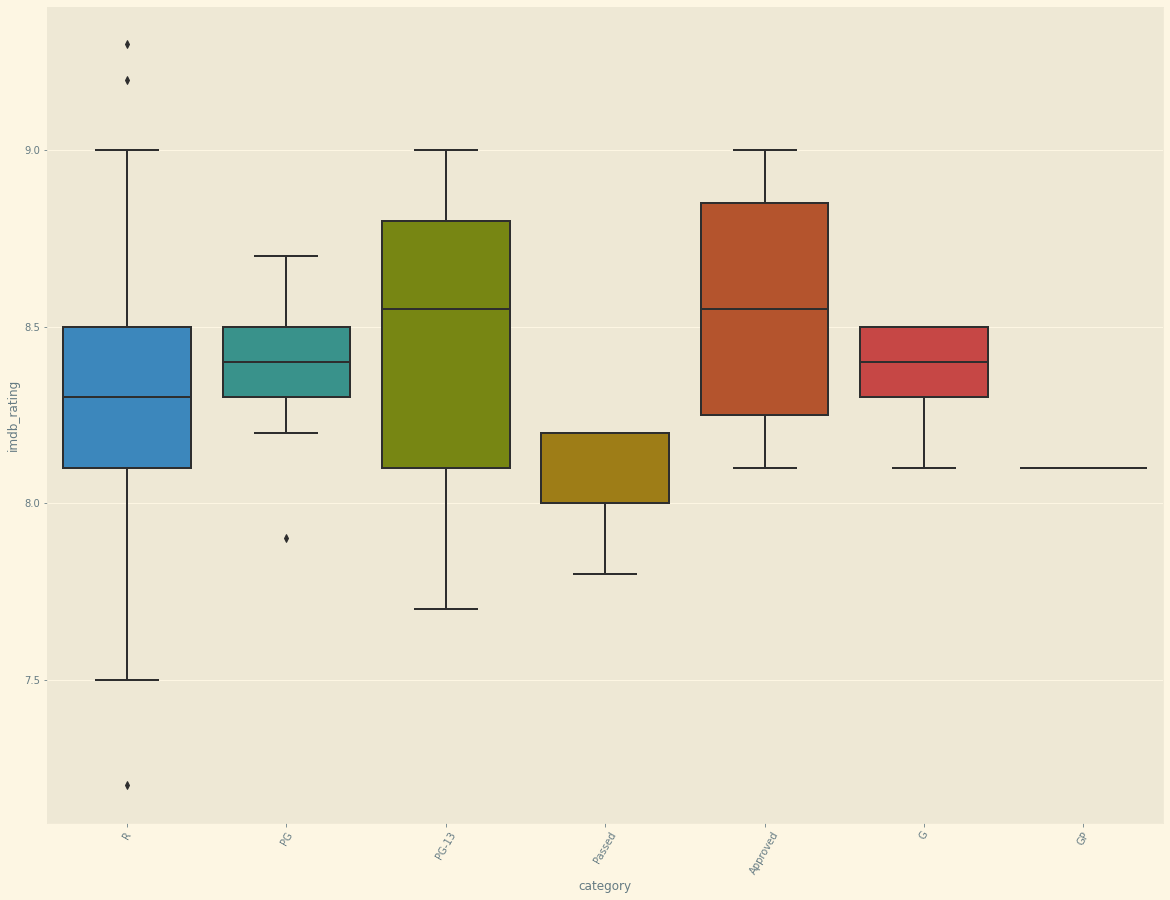

In [12]:
fig, ax = plt.subplots(figsize=(20,15))
plt.xticks(rotation=60)
ax = sns.boxplot(x="category", y="imdb_rating", data=df)

# 🎬The most common genres🎬

array([<AxesSubplot:ylabel='genre'>], dtype=object)

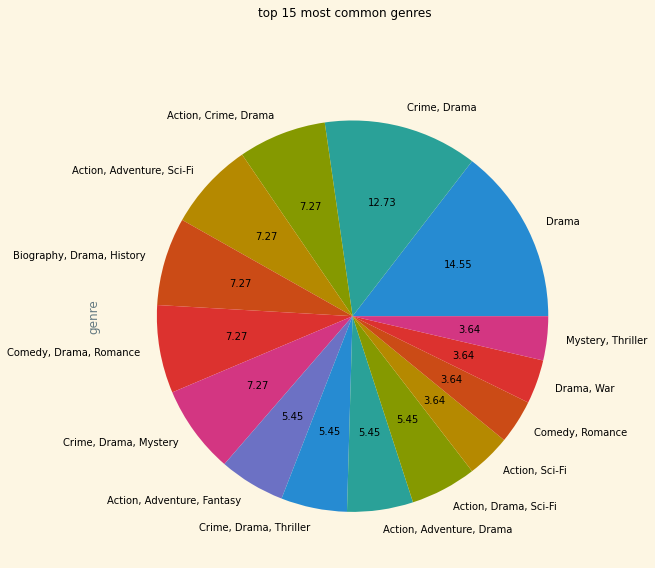

In [13]:
df['genre'].value_counts().head(15).plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(9,9), title='top 15 most common genres')

# 🎥Movies vs rating🎥

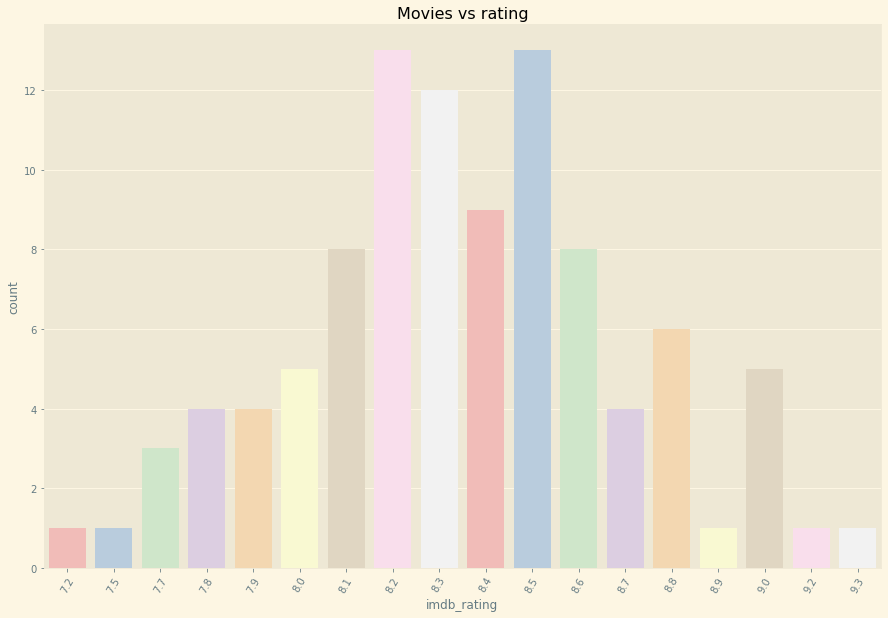

In [14]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=60)
sns.countplot(data=df,x="imdb_rating",palette="Pastel1").set(title='Movies vs rating')
plt.show()

# 🎬Rating vs gross total🎬

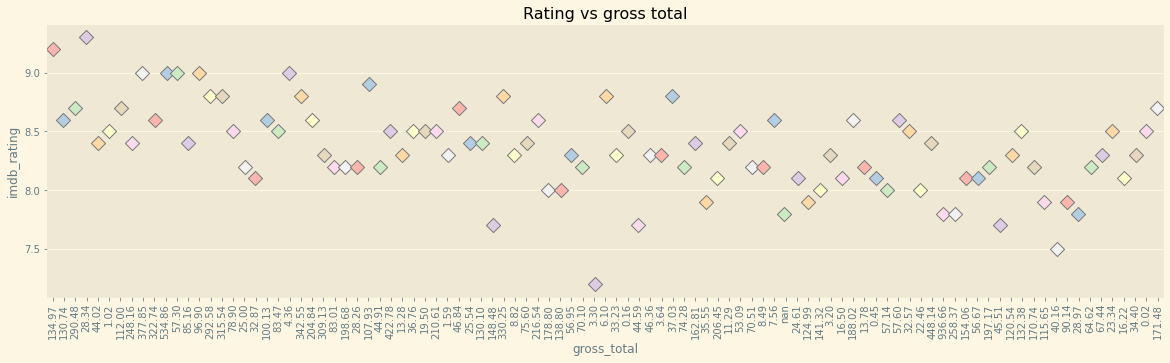

In [15]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation=90)
ax = sns.stripplot(y="imdb_rating", x="gross_total", data=df, palette="Pastel1", s=10, marker="D", linewidth=1, alpha=1).set(title='Rating vs gross total')

# 🎥Rating vs category🎥

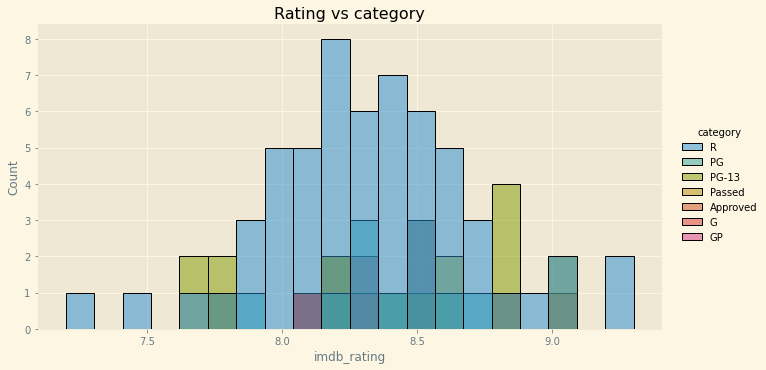

In [16]:
sns.displot(df, x='imdb_rating',bins=20, hue='category',aspect=1.9).set(title='Rating vs category')
plt.show()

In [17]:
df['year_of_release']=df['year_of_release'].str.replace('\(|\)','')

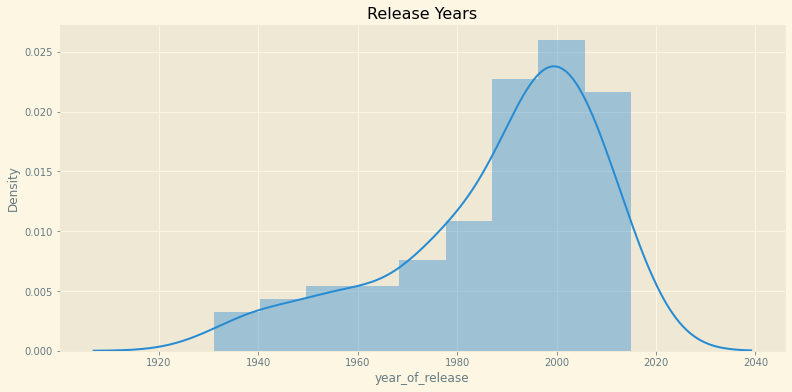

In [18]:
plt.figure(figsize=(13,6))
sns.distplot(df["year_of_release"])
plt.title("Release Years")
plt.show()

In [19]:
df['run_time'] = df['run_time'].apply(lambda x: float(x.split()[0].replace('min', '')))

# 🎬Runtime in minutes🎬

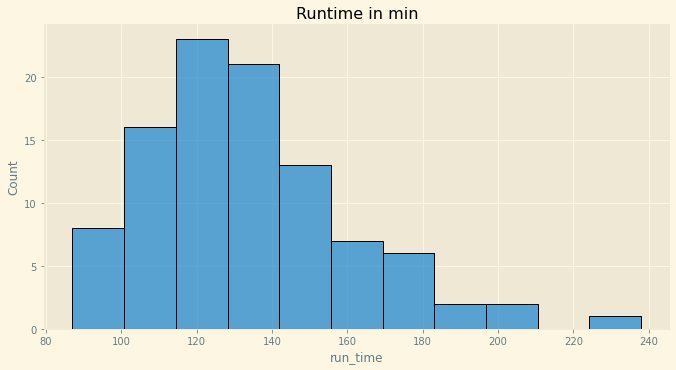

In [20]:
sns.displot(df, x= 'run_time', aspect=1.9)
plt.title("Runtime in min")
plt.show()

# 🎥Runtime vs vote average🎥

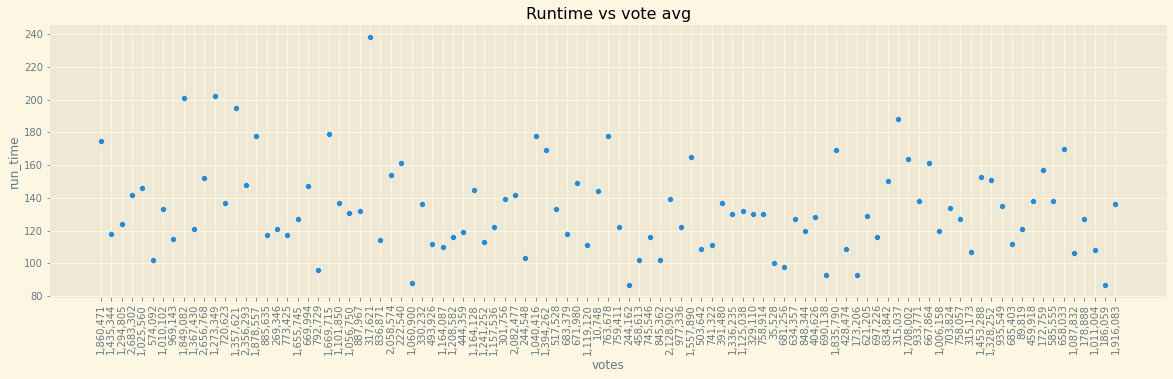

In [21]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=df['votes'], y=df["run_time"])
plt.title("Runtime vs vote avg")
plt.xticks(rotation=90)
plt.show()

# 🎬Average indicators "run_time", "imdb_rating" for all genres of films, sorted by rating🎬

<AxesSubplot:xlabel='genre'>

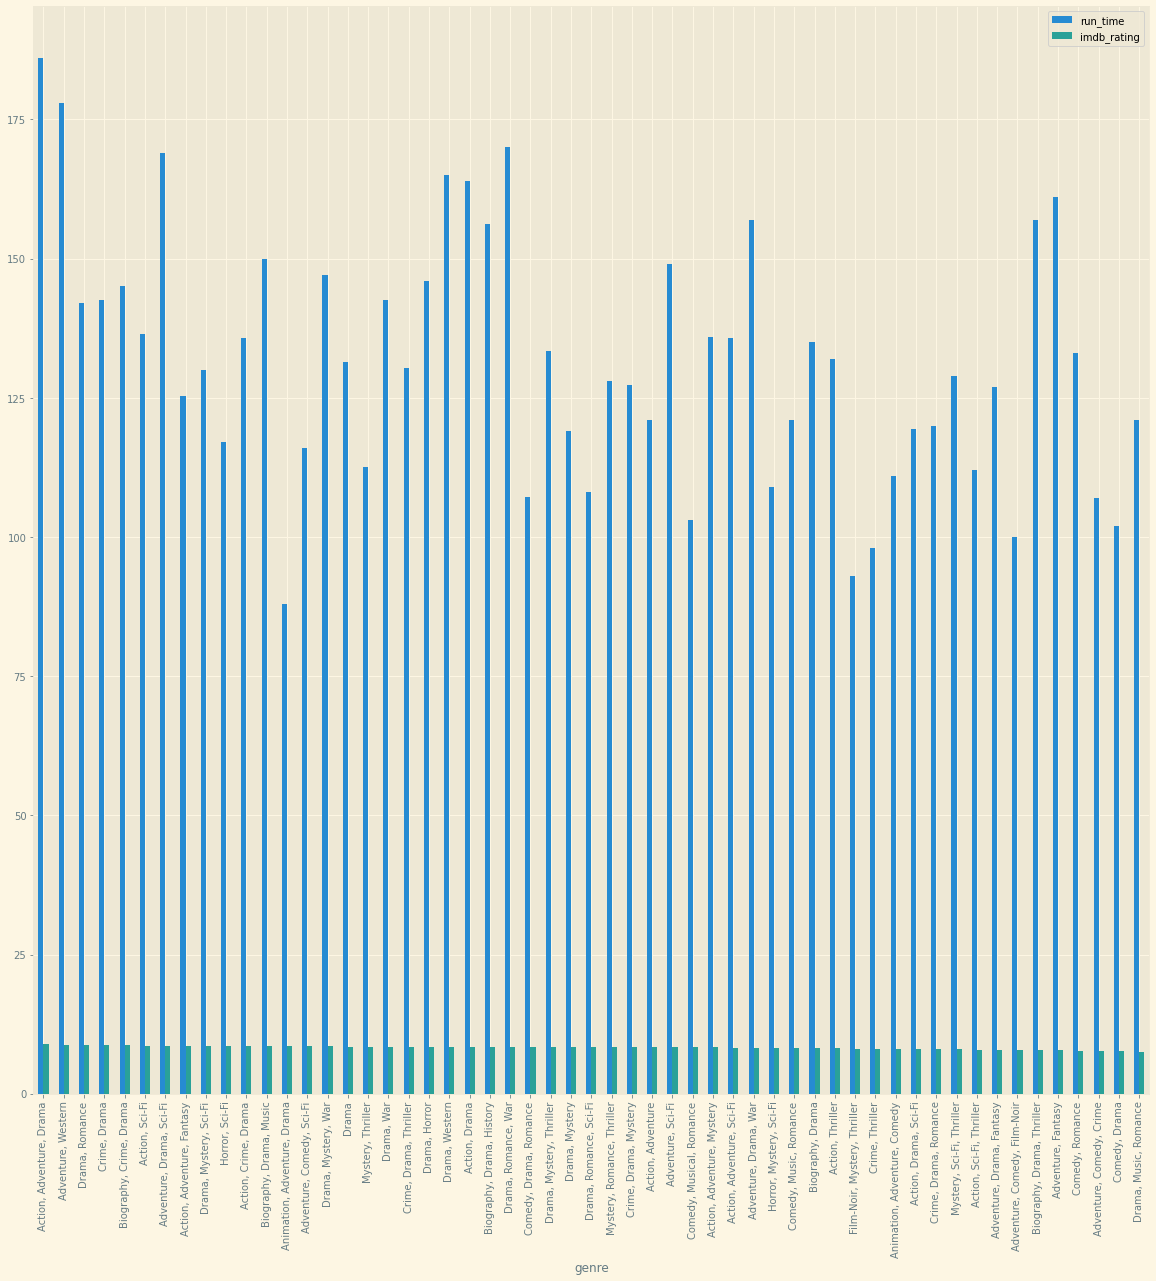

In [22]:
df.groupby('genre')['run_time', 'imdb_rating'].agg('mean').sort_values(by='imdb_rating', ascending=False).plot(kind='bar',figsize=(20,20))

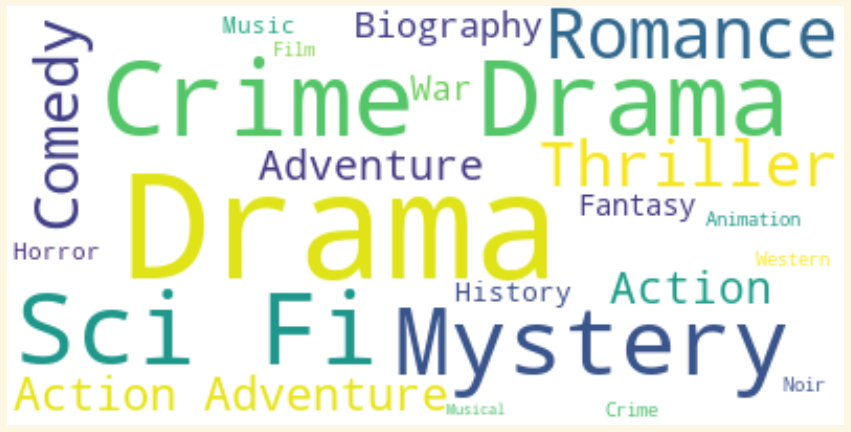

In [23]:
stopwords = set(STOPWORDS)
text = " ".join(df['genre'])

plt.figure( figsize=(15,10))
wordcloud = WordCloud(background_color = 'white',stopwords=stopwords, max_words=100, max_font_size=70, random_state=100).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');
plt.show();

**Hi, thank you so much for reading to the end, i just recently started doing analytics and your advice and comments are important to me. Don't forget to upvote this notebook if you like it!**